In [1]:
from pandas import *
from math import *

In [59]:
choice_point = read_csv('./choice_point.csv', index_col=None, encoding='utf-8')
choice_point.head()

,No.,Time,Source,Destination,Protocol,Length,Length.1,Content-Length,Sequence number,Next sequence number,Acknowledgment number,Info
0,48739,161.533639,192.168.7.33,52.51.252.175,HTTP,492,6273,6249,299614,300052,86455,POST /personalization/cl2 HTTP/1.1 (applicati...
1,64792,216.551213,192.168.7.33,52.51.252.175,HTTP,1370,5691,5667,343468,344784,104151,POST /personalization/cl2 HTTP/1.1 (applicati...
2,73475,225.353758,192.168.7.33,52.51.252.175,HTTP,274,6055,6031,352739,352959,105357,POST /personalization/cl2 HTTP/1.1 (applicati...
3,90150,492.768692,192.168.7.33,52.51.252.175,HTTP,1354,5675,5651,446338,447638,147557,POST /personalization/cl2 HTTP/1.1 (applicati...
4,97602,498.392339,192.168.7.33,52.51.252.175,HTTP,258,6039,6015,455593,455797,148762,POST /personalization/cl2 HTTP/1.1 (applicati...


In [60]:
choice_point.drop(index=2, inplace=True)
choice_point.drop(index=4, inplace=True)

In [61]:
choice_point.head()

,No.,Time,Source,Destination,Protocol,Length,Length.1,Content-Length,Sequence number,Next sequence number,Acknowledgment number,Info
0,48739,161.533639,192.168.7.33,52.51.252.175,HTTP,492,6273,6249,299614,300052,86455,POST /personalization/cl2 HTTP/1.1 (applicati...
1,64792,216.551213,192.168.7.33,52.51.252.175,HTTP,1370,5691,5667,343468,344784,104151,POST /personalization/cl2 HTTP/1.1 (applicati...
3,90150,492.768692,192.168.7.33,52.51.252.175,HTTP,1354,5675,5651,446338,447638,147557,POST /personalization/cl2 HTTP/1.1 (applicati...


In [63]:
choice_time = []
for _,packet in choice_point.iterrows():
    choice_time.append(floor(packet.Time))

choice_time

[161, 216, 492]

In [64]:
app_data = read_csv('./app_data.csv', index_col=None, encoding='utf-8')
app_data.head()

,No.,Time,Source,Destination,Protocol,Length,Length.1,Content-Length,Sequence number,Next sequence number,Acknowledgment number,Info
0,18592,18.594998,192.168.7.33,45.57.50.133,HTTP,713,654,NaN,611,1270,3208,GET /?o=AQHG0ISxsszfN0p0f5-NRzJ8nUJmcdmqZJNYA2...
1,18593,18.595113,192.168.7.33,45.57.50.133,HTTP,730,671,NaN,611,1287,3208,GET /range/0-114851?o=AQHG0ISxsszfN0p7dJ2FQjF7...
2,18594,18.595199,192.168.7.33,45.57.50.133,HTTP,728,669,NaN,611,1285,3208,GET /range/0-114851?o=AQHG0ISxsszfN0p1dp-CRjRz...
3,18609,18.627319,45.57.50.133,192.168.7.33,TLSv1.2,646,587,NaN,3514,4106,1270,[SSL segment of a reassembled PDU]
4,18610,18.627320,45.57.50.133,192.168.7.33,TLSv1.2,624,565,NaN,3514,4084,1287,[SSL segment of a reassembled PDU]


In [65]:
app_data_interest = app_data[app_data.Time >= choice_time[0]]

In [66]:
app_data_interest.head()

,No.,Time,Source,Destination,Protocol,Length,Length.1,Content-Length,Sequence number,Next sequence number,Acknowledgment number,Info
2188,48766,162.017503,192.168.7.33,45.57.50.133,HTTP,772,713,NaN,628,1346,157,GET /range/16428265-16583594?o=AQHG0ISxsszfN0p...
2189,48772,162.019348,192.168.7.33,45.57.50.133,HTTP,768,709,NaN,628,1342,157,GET /range/2127135-2143753?o=AQHG0ISxsszfN0p1d...
2190,48779,162.026739,192.168.7.33,45.57.50.133,HTTP,774,715,NaN,628,1348,157,GET /range/410020255-410177226?o=AQHG0ISxsszfN...
2191,48781,162.049012,45.57.50.133,192.168.7.33,TLSv1.2,624,565,NaN,157,727,1346,[SSL segment of a reassembled PDU]
2192,48792,162.053829,45.57.50.133,192.168.7.33,TLSv1.2,1514,13103,NaN,12407,13867,1346,[SSL segment of a reassembled PDU] [TCP segmen...


In [69]:
a = [0]
b= []

In [70]:
start_time = choice_time[0]
b.append(start_time)
i = 0
for _,packet in app_data_interest.iterrows():
    curr_time = floor(packet.Time)
    if curr_time > start_time:
        i += 1
        a.append(0)
        b.append(curr_time)
        start_time = curr_time
    a[i]+= 1
    

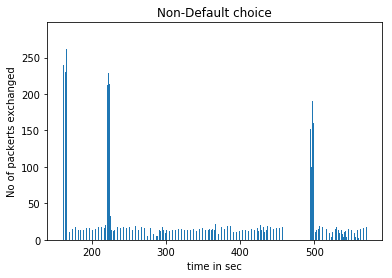

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.bar(b, a)
plt.ylabel('No of packerts exchanged')
plt.xlabel('time in sec')
plt.title("Non-Default choice")
plt.show()